## Immanuella Duke
## Final project SCAMP

### Used car dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

### Data Modelling step
In this notebook, we redesign the problem as a classification and regression model and build three models each on the data.
We later make prediction on the data and evaluate the performance of those predictions and compare the results.

-----------------------------------------------------------------------------------

### Import libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import gc
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,precision_score,classification_report,accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.neural_network import MLPClassifier,MLPRegressor


import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Download dataset from Drive

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
#Import dataset
import csv
vehicles_df = pd.read_csv('new_vehicle.csv')

In [5]:
vehicles_df.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,27,16,33590.0,2014.0,14,16289,2,5,17,57923.0,0,2,0,1,477,12693,1
1,28,16,22590.0,2010.0,7,16608,2,5,17,71229.0,0,2,0,1,477,1749,1
2,29,16,39590.0,2020.0,7,16652,2,5,17,19160.0,0,2,0,1,477,6348,1
3,30,16,30990.0,2017.0,38,19258,2,5,17,41124.0,0,2,1,1,477,6348,1
4,31,16,15000.0,2013.0,13,8260,0,4,17,128000.0,0,0,67,1,1467,1,1


In [6]:
# drop the previous index - first column

vehicles_df = vehicles_df.drop(columns =['Unnamed: 0'])

##  **In this project, we will define the modelling in two ways: as a  classfication problem, then as a regression problem.**

**Classfication problem: Here, there will be predefined class groups for the cars ranging from very low price to exorbitant prices. Then we will predict the class that a car belongs to in the prediction stage.**

**Regression Problem: Here, the models will aim to predict the raw prices of the cars down to the most precise value. Regression metrics will be used to evaluate these models.**



---

Regression dataframe

In [7]:
vehicles_regression_df = vehicles_df.copy(deep=True)



---
Classification dataframe


In [8]:
vehicles_classification_df = vehicles_df.copy(deep=True)

In [8]:
#sort the price column
vehicles_classification_df.price.sort_values()


84282         1.0
31968         1.0
6237          1.0
97784         1.0
97783         1.0
           ...   
283887    54590.0
267135    54590.0
261997    54590.0
225639    54590.0
167298    54590.0
Name: price, Length: 366901, dtype: float64

We have values ranging from $1 to \$54590 dollars

 **The cars will be categorized into 5 groups:**


1.   less than 10,000  : *1*
2.   10,000 - 20,000   : *2*
3.   20,000 - 30,000   : *3*
3.   30,000 - 40,000   : *4*
3.   40,000 - 50,000   : *5*
3.   greater than 50,000 : *6*



In [9]:
vehicles_classification_df['new_price'] = 0

In [10]:
 vehicles_classification_df.loc[((vehicles_classification_df['price'] <= 10000))  , 'new_price'] = 1
 vehicles_classification_df.loc[((vehicles_classification_df['price'] > 10000)) & ((vehicles_classification_df['price'] <= 20000))  , 'new_price'] = 2
 vehicles_classification_df.loc[((vehicles_classification_df['price'] > 20000)) & ((vehicles_classification_df['price'] <= 30000))  , 'new_price'] = 3
 vehicles_classification_df.loc[((vehicles_classification_df['price'] > 30000)) & ((vehicles_classification_df['price'] <= 40000))  , 'new_price'] = 4
 vehicles_classification_df.loc[((vehicles_classification_df['price'] > 40000)) & ((vehicles_classification_df['price'] <= 50000))  , 'new_price'] = 5
 vehicles_classification_df.loc[ ((vehicles_classification_df['price'] > 50000))  , 'new_price'] = 6

In [12]:
vehicles_classification_df['new_price'].sort_values()

183450    1
163828    1
163829    1
163830    1
163831    1
         ..
81708     6
256716    6
19447     6
81564     6
21008     6
Name: new_price, Length: 366901, dtype: int64

The new price catergory has been properly set. we can now drop the numerical price column for the classification df

In [11]:
vehicles_classification_df = vehicles_classification_df.drop(columns = ['price'])

In [12]:
vehicles_classification_df

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,new_price
0,16,2014.0,14,16289,2,5,17,57923.0,0,2,0,1,477,12693,1,4
1,16,2010.0,7,16608,2,5,17,71229.0,0,2,0,1,477,1749,1,3
2,16,2020.0,7,16652,2,5,17,19160.0,0,2,0,1,477,6348,1,4
3,16,2017.0,38,19258,2,5,17,41124.0,0,2,1,1,477,6348,1,4
4,16,2013.0,13,8260,0,4,17,128000.0,0,0,67,1,1467,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366896,397,2019.0,30,12507,2,4,17,32226.0,0,2,43,1,739,3948,50,3
366897,397,2020.0,40,15703,2,6,17,12029.0,0,2,43,1,739,6348,50,4
366898,397,2020.0,6,20479,2,6,1,4174.0,0,2,0,1,373,12693,50,4
366899,397,2018.0,23,7379,2,4,17,30112.0,0,2,43,1,739,10988,50,3


Classification df is set!

In [13]:
gc.collect()

331



---



---



### Split into train and testing set

For classification

In [14]:
Y_classification = vehicles_classification_df.new_price  #only the new price column is the target col
X_classification = vehicles_classification_df.iloc[:,:-1]   #all columns apart from the new price column

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, Y_classification, test_size=0.33, random_state=42)  
#Use a third for testing

Evaluation function for classification models

In [30]:
def evaluate_classification_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("The accuracy of the model is: ", accuracy)
  print("The confusion matrix:\n", confusion_matrix(y_true, y_pred))
  print("The precision score: ",precision_score(y_true, y_pred, average= 'weighted'))
  print("The classification report:\n", classification_report(y_true, y_pred))
  return accuracy


## Train and evaluate models for CLASSIFICATION

**Random Forest Classifier**

In [16]:
rf_class = RandomForestClassifier(max_depth=2, random_state=0)
rf_class.fit(X_class_train, y_class_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
y_class_rf_pred = rf_class.predict(X_class_test)

In [18]:
rf_class_accuracy = evaluate_classification_model(y_class_test, y_class_rf_pred)

The accuracy of the model is:  0.49520969953253274
The confusion matrix:
 [[33812  6503    20     0     0     0]
 [14353 21732  1069     0     0     0]
 [ 3444 14715  4415     0     0     0]
 [ 1015  8657  5706     0     0     0]
 [  217  3674   909     0     0     0]
 [   22   716    99     0     0     0]]
The precision score:  0.39953778830490855
The classification report:
               precision    recall  f1-score   support

           1       0.64      0.84      0.73     40335
           2       0.39      0.58      0.47     37154
           3       0.36      0.20      0.25     22574
           4       0.00      0.00      0.00     15378
           5       0.00      0.00      0.00      4800
           6       0.00      0.00      0.00       837

    accuracy                           0.50    121078
   macro avg       0.23      0.27      0.24    121078
weighted avg       0.40      0.50      0.43    121078



**K-NEAREST neighbours Classifier**

In [19]:
knn_class = KNeighborsClassifier(n_neighbors=6) #because of the 6 classes
knn_class.fit(X_class_train, y_class_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [20]:
y_class_knn_pred = knn_class.predict(X_class_test)

In [21]:
knn_class_accuracy = evaluate_classification_model(y_class_test, y_class_knn_pred)

The accuracy of the model is:  0.6660252068914254
The confusion matrix:
 [[31213  6610  1556   725   207    24]
 [10470 21774  3207  1269   391    43]
 [ 2550  4792 13638  1207   344    43]
 [  895  1875  1426 10861   299    22]
 [  343   622   522   545  2742    26]
 [   50   116    82   109    67   413]]
The precision score:  0.6651476826225182
The classification report:
               precision    recall  f1-score   support

           1       0.69      0.77      0.73     40335
           2       0.61      0.59      0.60     37154
           3       0.67      0.60      0.63     22574
           4       0.74      0.71      0.72     15378
           5       0.68      0.57      0.62      4800
           6       0.72      0.49      0.59       837

    accuracy                           0.67    121078
   macro avg       0.68      0.62      0.65    121078
weighted avg       0.67      0.67      0.66    121078



**Neural network (MLP) Classifier**

In [22]:
neural_net = MLPClassifier(random_state=1, max_iter=50).fit(X_class_train, y_class_train)

In [23]:
y_class_mlp_pred = neural_net.predict(X_class_test)


In [24]:
mlp_class_accuracy = evaluate_classification_model(y_class_test, y_class_mlp_pred)

The accuracy of the model is:  0.4836882009944003
The confusion matrix:
 [[29944  8818   732   473    94   274]
 [13181 19265  2089  2213   172   234]
 [ 2838 11215  3559  4438   222   302]
 [  833  5568  2848  5472   313   344]
 [  318  1937   666  1441   189   249]
 [   28   317    89   234    34   135]]
The precision score:  0.46015229864532253
The classification report:
               precision    recall  f1-score   support

           1       0.64      0.74      0.68     40335
           2       0.41      0.52      0.46     37154
           3       0.36      0.16      0.22     22574
           4       0.38      0.36      0.37     15378
           5       0.18      0.04      0.06      4800
           6       0.09      0.16      0.11       837

    accuracy                           0.48    121078
   macro avg       0.34      0.33      0.32    121078
weighted avg       0.46      0.48      0.46    121078



**Compare models and choose the best**

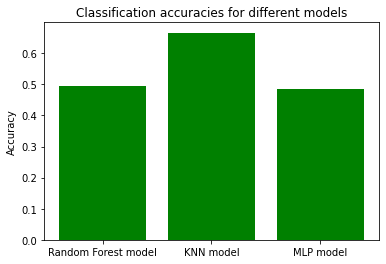

Average across all models:  0.5483077024727862


In [62]:
x = [ 'Random Forest model', 'KNN model', 'MLP model']
y = [ rf_class_accuracy, knn_class_accuracy, mlp_class_accuracy]
plt.bar(x,y, color = 'green')
plt.title('Classification accuracies for different models')
plt.ylabel('Accuracy')
plt.show()
print('Average across all models: ', np.mean(y))

Accuracy for Random forest model: 0.495

Accuracy for KNN model: 0.666

Accuracy for MLP model: 0.484

### **KNN produces the best accuracy for this classification problem with an accuracy of 66%**




---



---


### Split into train and testing set

For regression

In [32]:
vehicles_regression_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,16,33590.0,2014.0,14,16289,2,5,17,57923.0,0,2,0,1,477,12693,1
1,16,22590.0,2010.0,7,16608,2,5,17,71229.0,0,2,0,1,477,1749,1
2,16,39590.0,2020.0,7,16652,2,5,17,19160.0,0,2,0,1,477,6348,1
3,16,30990.0,2017.0,38,19258,2,5,17,41124.0,0,2,1,1,477,6348,1
4,16,15000.0,2013.0,13,8260,0,4,17,128000.0,0,0,67,1,1467,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366896,397,23590.0,2019.0,30,12507,2,4,17,32226.0,0,2,43,1,739,3948,50
366897,397,30590.0,2020.0,40,15703,2,6,17,12029.0,0,2,43,1,739,6348,50
366898,397,34990.0,2020.0,6,20479,2,6,1,4174.0,0,2,0,1,373,12693,50
366899,397,28990.0,2018.0,23,7379,2,4,17,30112.0,0,2,43,1,739,10988,50


In [33]:
#move price column to the end
vehicles_regression_df = vehicles_regression_df.drop(columns=['price'])
vehicles_regression_df['price'] = vehicles_df.price

In [34]:
vehicles_regression_df

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,16,2014.0,14,16289,2,5,17,57923.0,0,2,0,1,477,12693,1,33590.0
1,16,2010.0,7,16608,2,5,17,71229.0,0,2,0,1,477,1749,1,22590.0
2,16,2020.0,7,16652,2,5,17,19160.0,0,2,0,1,477,6348,1,39590.0
3,16,2017.0,38,19258,2,5,17,41124.0,0,2,1,1,477,6348,1,30990.0
4,16,2013.0,13,8260,0,4,17,128000.0,0,0,67,1,1467,1,1,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366896,397,2019.0,30,12507,2,4,17,32226.0,0,2,43,1,739,3948,50,23590.0
366897,397,2020.0,40,15703,2,6,17,12029.0,0,2,43,1,739,6348,50,30590.0
366898,397,2020.0,6,20479,2,6,1,4174.0,0,2,0,1,373,12693,50,34990.0
366899,397,2018.0,23,7379,2,4,17,30112.0,0,2,43,1,739,10988,50,28990.0


In [35]:
Y_regression = vehicles_regression_df.price  #only the new price column is the target col
X_regression = vehicles_regression_df.iloc[:,:-1]   #all columns apart from the new price column

X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(X_regression, Y_regression, test_size=0.33, random_state=42)  
#Use a third for testing

Evaluation function for regression models

In [53]:
def evaluate_regression_model(y_true, y_pred):
  mape = np.mean(np.abs((y_true - y_pred)/y_true))
  print("The MAPE of the model is: ", mape)
  print("The RMSE of the model is: ", np.sqrt(mean_squared_error(y_true, y_pred)))
  print("The MAE of the model is: ",mean_absolute_error(y_true, y_pred))
  r_score = r2_score(y_true, y_pred)
  print("The R score of the model is:", r_score)
  return r_score


## Train and evaluate models for REGRESSION

**Random Forest Regressor**

In [37]:
rf_regr = RandomForestRegressor(n_estimators=50, random_state=0)
rf_regr.fit(X_regr_train, y_regr_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [38]:
y_regr_rf_pred = rf_regr.predict(X_regr_test)

In [54]:
rf_regr_accuracy = evaluate_regression_model(y_regr_test, y_regr_rf_pred)

The MAPE of the model is:  16.442640262301957
The RMSE of the model is:  4423.749284562855
The MAE of the model is:  2355.5543319691724
The R score of the model is: 0.8650685244433403


**K-NEAREST Neighbours Regressor**

In [47]:
knn_regr= KNeighborsRegressor(n_neighbors=6) #because of the 6 classes
knn_regr.fit(X_regr_train, y_regr_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [48]:
y_regr_knn_pred = knn_regr.predict(X_regr_test)

In [55]:
knn_regr_accuracy = evaluate_regression_model(y_regr_test, y_regr_knn_pred)

The MAPE of the model is:  31.890210559041133
The RMSE of the model is:  7653.8933270105645
The MAE of the model is:  4890.873225661694
The R score of the model is: 0.5960784082799213


**Neural network (MLP) Regressor**

In [50]:
neural_net = MLPRegressor(random_state=1, max_iter=50).fit(X_regr_train, y_regr_train)

In [51]:
y_regr_mlp_pred = neural_net.predict(X_regr_test)


In [56]:
mlp_regr_accuracy = evaluate_regression_model(y_regr_test, y_regr_mlp_pred)

The MAPE of the model is:  65.1353286434945
The RMSE of the model is:  8762.669057459138
The MAE of the model is:  6478.023571604074
The R score of the model is: 0.47057422800187854


**Compare models and choose the best**

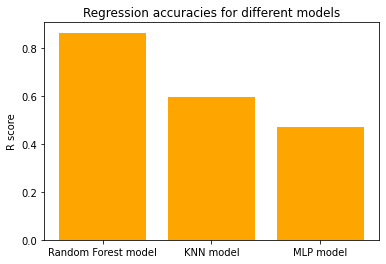

Average across all models:  0.6439070535750467


In [61]:
x = [ 'Random Forest model', 'KNN model', 'MLP model']
y = [ rf_regr_accuracy, knn_regr_accuracy, mlp_regr_accuracy]
plt.bar(x,y, color = 'orange')
plt.title('Regression accuracies for different models')
plt.ylabel('R score')
plt.show()

print('Average across all models: ', np.mean(y))

Accuracy for Random forest model: 0.865

Accuracy for KNN model: 0.596

Accuracy for MLP model: 0.470

### **Random Forest produces the best accuracy for this regression problem with an Rscore of 0.865 and MAPE of 16%**



---



---



## Conclusion

 Comparing the classification and regression approach

For the classification approach the average accuracy across all models is 0.548 whilst the accuracy across all models for the regressin problem is 0.644.

In general, we see that the regression approach gives better results than the classification one. This could be for different reasons:
*   The 6th group for the classification of prices, is smaller than others and therefore more difficult to predict correctly. This can be seen in the very low precision values in random forest classifier and MLP classifer models. The KNN classifier performs much better in regards to precision score of the 6th group because it uses the neighbouring algorithm.
*   Regression does better perhaps, because it is each to understand the relationships between the explanatory variables and predict a numeric price rather than a small value category. It is generally easier to do a regression than the multiclass classification.

